# B (rm_null)_ 2 Preparation for machine learning + Remove Null version

This time, remove null values and the experiment is executed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the file
data = pd.read_csv('../data/cleaned_data/semi_cleaned_data.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,M,67,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,F,61,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,M,80,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,F,49,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,F,79,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.shape

(5096, 11)

####  now, divide the data split numerical and categorical. 

In [4]:
numericals = data.select_dtypes(np.number)
categoricals = data.select_dtypes(exclude=np.number)

In [5]:
numericals

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,67,0,1,1,228.69,36.6,1
1,61,0,0,1,202.21,NaN,1
2,80,0,1,1,105.92,32.5,1
3,49,0,0,1,171.23,34.4,1
4,79,1,0,1,174.12,24.0,1
...,...,...,...,...,...,...,...
5091,80,1,0,1,83.75,NaN,0
5092,81,0,0,1,125.20,40.0,0
5093,35,0,0,1,82.99,30.6,0
5094,51,0,0,1,166.29,25.6,0


In [6]:
numericals.describe()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
count,5096.000000,5096.000000,5096.000000,5096.000000,5096.000000,4895.000000,5096.000000
mean,43.221154,0.096743,0.054160,0.655808,106.152598,28.786701,0.048862
std,22.652175,0.295636,0.226356,0.475151,45.286260,7.555565,0.215600
min,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,77.275000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,1.000000,91.885000,28.000000,0.000000
75%,61.000000,0.000000,0.000000,1.000000,114.060000,33.000000,0.000000
max,82.000000,1.000000,1.000000,1.000000,271.740000,59.700000,1.000000


In [7]:
# The target 'stroke' is dropped and merged later.
numericals = numericals.drop('stroke', axis=1)

##### As seen in the previous note, it needs transforamtion to 'age',  'glocose_level', 'bmi' and Min-Max scaling.

In [8]:
categoricals

,gender,work_type,residence_type,smoking_status
0,M,Private,Urban,formerly smoked
1,F,Self-employed,Rural,never smoked
2,M,Private,Rural,never smoked
3,F,Private,Urban,smokes
4,F,Self-employed,Rural,never smoked
...,...,...,...,...
5091,F,Private,Urban,never smoked
5092,F,Self-employed,Urban,never smoked
5093,F,Self-employed,Rural,never smoked
5094,M,Private,Rural,formerly smoked


##### It needs to be encoded. 

### numerical columns transformation

##### Apply power transformation to 'age',  'glocose_level', 'bmi'

In [9]:
from sklearn.preprocessing import PowerTransformer
import pickle



# Columns to apply power transformation
columns_to_transform = ['age', 'avg_glucose_level', 'bmi']

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

pt.fit(numericals[columns_to_transform])

# Fit and transform the specified columns

numericals[columns_to_transform] = pt.transform(numericals[columns_to_transform])


#save the transformer
#filename = "../scaler/transformer.pickle" # Path with filename

#with open(filename, "wb") as file:
#        pickle.dump(pt,file)



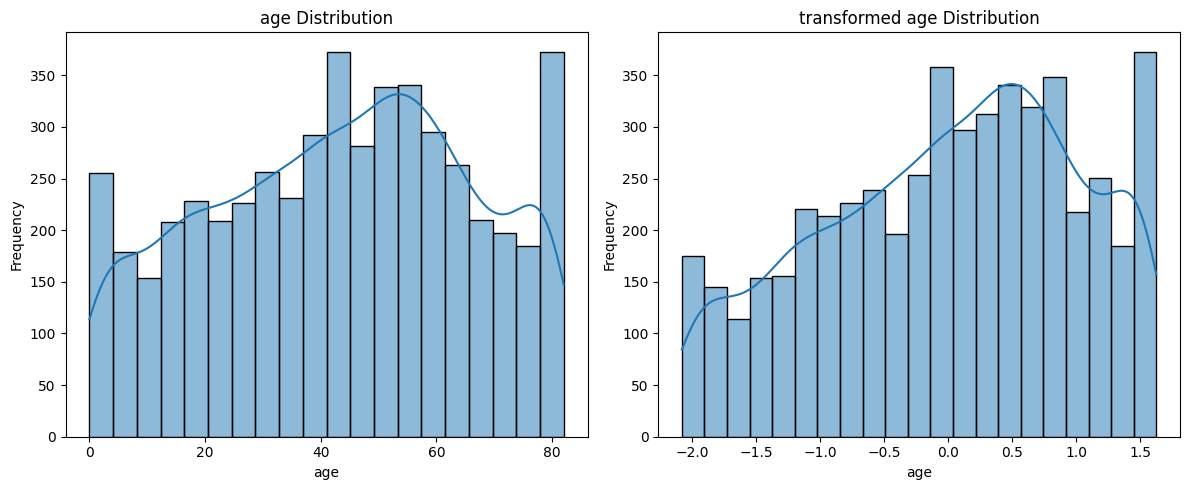

In [10]:
plt.figure(figsize=(12, 5))

# Plot 1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
sns.histplot(data['age'], kde=True)
# Set plot labels and title
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('age Distribution')

# Plot 2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
sns.histplot(numericals['age'], kde=True)
# Set plot labels and title
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('transformed age Distribution')

plt.tight_layout()  # To prevent overlapping of plots
plt.show()

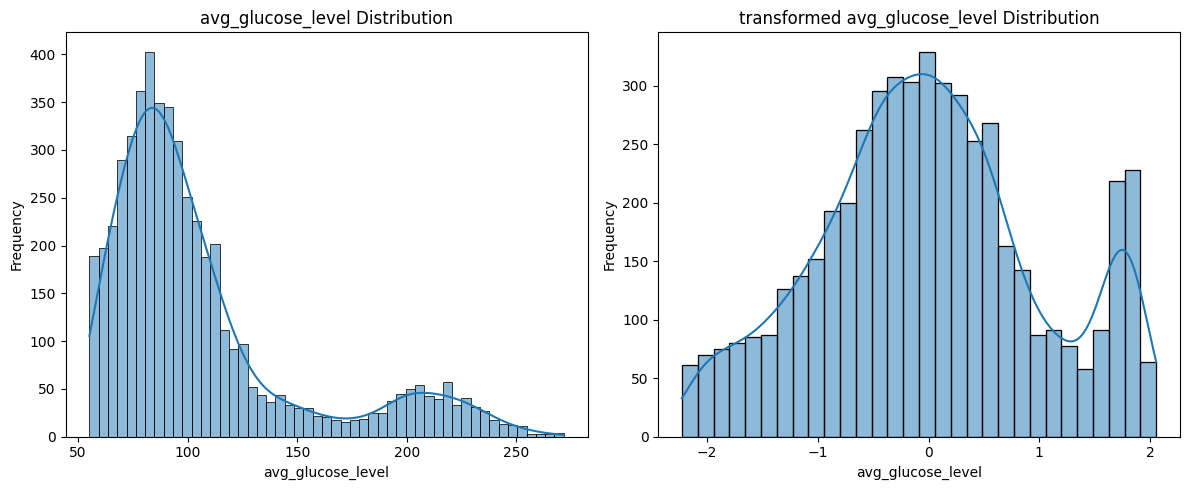

In [11]:
plt.figure(figsize=(12, 5))

# Plot 1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
sns.histplot(data['avg_glucose_level'], kde=True)
# Set plot labels and title
plt.xlabel('avg_glucose_level')
plt.ylabel('Frequency')
plt.title('avg_glucose_level Distribution')

# Plot 2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
sns.histplot(numericals['avg_glucose_level'], kde=True)
# Set plot labels and title
plt.xlabel('avg_glucose_level')
plt.ylabel('Frequency')
plt.title('transformed avg_glucose_level Distribution')

plt.tight_layout()  # To prevent overlapping of plots
plt.show()

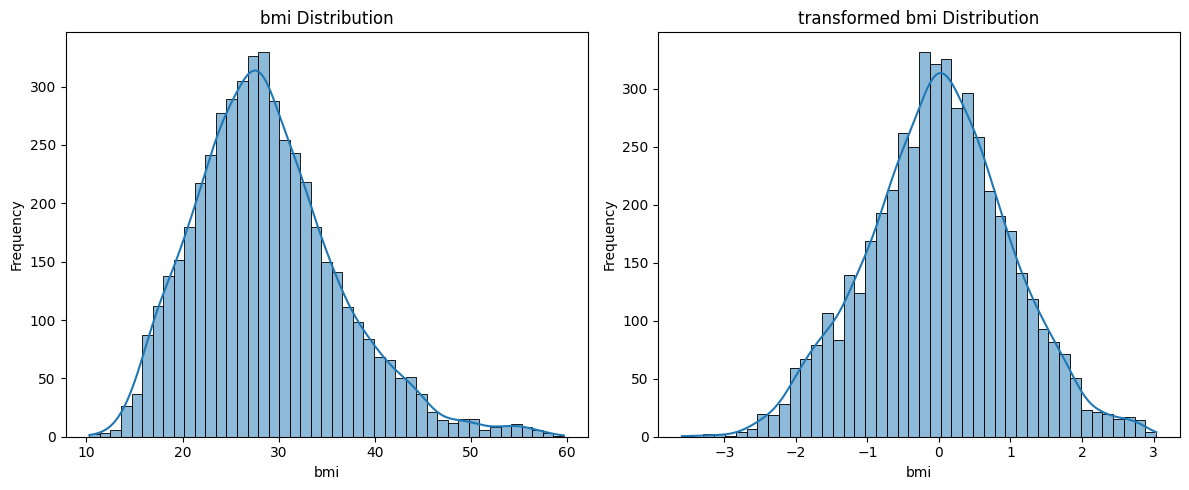

In [12]:
plt.figure(figsize=(12, 5))

# Plot 1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
sns.histplot(data['bmi'], kde=True)
# Set plot labels and title
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.title('bmi Distribution')

# Plot 2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
sns.histplot(numericals['bmi'], kde=True)
# Set plot labels and title
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.title('transformed bmi Distribution')

plt.tight_layout()  # To prevent overlapping of plots
plt.show()

#### Min Max scaler is appled for numerical columns

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(numericals)

scaled_numericals = scaler.transform(numericals) 


filename = "../scaler/min_max_scaler.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

In [14]:
numericals_scaled_df = pd.DataFrame(scaled_numericals, columns=numericals.columns)
numericals_scaled_df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
0,0.839182,0.0,1.0,1.0,0.954770,0.700525
1,0.773486,0.0,0.0,1.0,0.917002,NaN
2,0.978813,0.0,1.0,1.0,0.612224,0.630121
3,0.639247,0.0,0.0,1.0,0.857404,0.663675
4,0.968192,1.0,0.0,1.0,0.863892,0.454702


In [15]:
numericals_scaled_df.shape

(5096, 6)

In [16]:
numericals_scaled_df.describe()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
count,5096.000000,5096.000000,5096.000000,5096.000000,5096.000000,4895.000000
mean,0.561360,0.096743,0.054160,0.655808,0.520028,0.541874
std,0.269567,0.295636,0.226356,0.475151,0.233460,0.150813
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354858,0.000000,0.000000,0.000000,0.368429,0.442752
50%,0.593521,0.000000,0.000000,1.000000,0.512284,0.543120
75%,0.773486,0.000000,0.000000,1.000000,0.658622,0.639117
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## categorical columns

##### convert categorical columns into dummy variables

In [17]:
categoricals.head(2)

,gender,work_type,residence_type,smoking_status
0,M,Private,Urban,formerly smoked
1,F,Self-employed,Rural,never smoked


In [18]:
encoded_categoricals = pd.get_dummies(categoricals, columns=categoricals.columns, dtype=int)
encoded_categoricals

,gender_F,gender_M,work_type_Govt_job,work_type_Other,work_type_Private,work_type_Self-employed,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,1,0,0
1,1,0,0,0,0,1,1,0,0,0,1,0
2,0,1,0,0,1,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1
4,1,0,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5091,1,0,0,0,1,0,0,1,0,0,1,0
5092,1,0,0,0,0,1,0,1,0,0,1,0
5093,1,0,0,0,0,1,1,0,0,0,1,0
5094,0,1,0,0,1,0,1,0,0,1,0,0


### concatanate columns 

In [19]:
numericals_scaled_df.reset_index(drop=True)
encoded_categoricals.reset_index(drop=True)


,gender_F,gender_M,work_type_Govt_job,work_type_Other,work_type_Private,work_type_Self-employed,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,1,0,0
1,1,0,0,0,0,1,1,0,0,0,1,0
2,0,1,0,0,1,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1
4,1,0,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5091,1,0,0,0,1,0,0,1,0,0,1,0
5092,1,0,0,0,0,1,0,1,0,0,1,0
5093,1,0,0,0,0,1,1,0,0,0,1,0
5094,0,1,0,0,1,0,1,0,0,1,0,0


In [20]:
concatenated_data = pd.concat([numericals_scaled_df,encoded_categoricals, data['stroke']], axis=1)
concatenated_data

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_F,gender_M,work_type_Govt_job,work_type_Other,work_type_Private,work_type_Self-employed,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0.839182,0.0,1.0,1.0,0.954770,0.700525,0,1,0,0,1,0,0,1,0,1,0,0,1
1,0.773486,0.0,0.0,1.0,0.917002,NaN,1,0,0,0,0,1,1,0,0,0,1,0,1
2,0.978813,0.0,1.0,1.0,0.612224,0.630121,0,1,0,0,1,0,1,0,0,0,1,0,1
3,0.639247,0.0,0.0,1.0,0.857404,0.663675,1,0,0,0,1,0,0,1,0,0,0,1,1
4,0.968192,1.0,0.0,1.0,0.863892,0.454702,1,0,0,0,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,0.978813,1.0,0.0,1.0,0.438543,NaN,1,0,0,0,1,0,0,1,0,0,1,0,0
5092,0.989416,0.0,0.0,1.0,0.712074,0.753763,1,0,0,0,0,1,0,1,0,0,1,0,0
5093,0.476578,0.0,0.0,1.0,0.430895,0.594778,1,0,0,0,0,1,1,0,0,0,1,0,0
5094,0.661912,0.0,0.0,1.0,0.845774,0.491524,0,1,0,0,1,0,1,0,0,1,0,0,0


In [21]:
concatenated_data2 = concatenated_data.copy()
df_without_null = concatenated_data2.dropna()

In [22]:
df_without_null.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
gender_F                          0
gender_M                          0
work_type_Govt_job                0
work_type_Other                   0
work_type_Private                 0
work_type_Self-employed           0
residence_type_Rural              0
residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
stroke                            0
dtype: int64

In [24]:
df_without_null['stroke'].value_counts()

stroke
0    4686
1     209
Name: count, dtype: int64

In [25]:
#save the file
df_without_null.to_csv('../data/cleaned_data/rm_null_cleaned_data.csv', index=False)